### Overview
In this notebook, we consider an alternative to the finite difference methods used in the previous exercise - finite element methods. Conceptually, the investment is higher, the math a little more sophisticated, the coding a little more complex. However, they payoff is good. Key advantages of the finite element method include:
* easier to use non-uniform meshes; ie the nodes do not have to be evenly spaced.
* the application of the boundary conditions is more elegant, and less prone to programming errors
* certain challenging functions, for example delta functions, can be included in the domain without difficulty
* deep literature
* numerous pre-existing libraries

### Basis functions
To begin, we recognize that we to estimate the solution to a partial differential equation (PDE). Let us suppose that our approximate solution should be in the form of a sum over basis functions

$u(x) \approx \sum_i u_i\varphi_i(x)$

As $i\to \infty$ the relation becomes exact. Recall Taylor's series expansions or Fourier series to understand how a function can be written in terms of basis functions. The basis functions are $\varphi_i$ and the expanion coefficients are $u_i$. The idea will be that we somehow select the $\varphi_i$, and then we will use the PDE to determine the correct $u_i$. The $u_i$ provide an estimate of the function at the nodal points. The $\varphi_i$ give us a way to interpolate between nodal points.

Now, how to select the $\varphi_i$? To begin, for simplicity assume they are linear. Additionally, let us assume the basis functions only overlap with neighboring basis functions. The reason for this will be clear in a moment. With those conditions, we can write equations as follows

$
\varphi_i(x) = 
\begin{cases}
\frac{x-x_{i-1}}{x_{i}-x_{i-1}},~ \text{for}~~ x_{i-1} \le x < x_i\\
\frac{x_{i+1}-x}{x_{i+1}-x_{i}},~ \text{for}~~ x_{i} \le x < x_{i+1}\\
0,~\text{for}~~x<x_{i-1}~ \text{or}~ x\ge ~x_{i+1}
\end{cases}
$

Draw these out, they are sometimes called "hat" functions. They have the convenient property that

$\varphi_i(x_j) = \delta_{i,j}$

where $\delta_{i,j}$ is the Kronecker delta function, $\delta_{i,j} =1 $ if $i=j$ and 0 if $i\ne j$. As a result of this property, the solution at a node $i$ is

$u(x_i) = \sum_j u_j\varphi_j(x_i) = \sum_j u_j \delta_{j,i} = u_i.$

Before settling in with the method, make sure you understand the interpolation scheme by using it to interpolate the function $y = 4x(1-x)$ on the unit interval $x=[0,1]$, with a uniform spaced mesh with 4 total nodes.

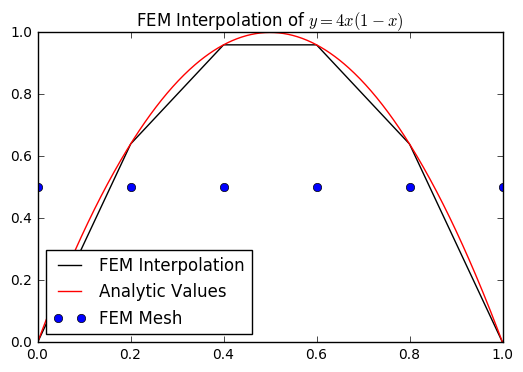

In [1]:
import pylab as pl
from scipy.integrate import quadrature 
from __future__ import division

def phi_i(x)
    a = (x - x[i-1])/h
    b = (x[i+1] - x)/h
    return a,b,0
    

def phi(x, i, m):
    """
    1D FEM linear (CG) shape funtion
    INPUTS:
        x := a numpy array of coordinates to evaluate phi at
        i := the ith hat function, centered at the ith point
             in the mesh, where 0 is the first function N-1 the last
        m := a finite element mesh in the form of a numpy array 
             containing the coordinates of N points on a line
    OUTPUT:
        returns phi_i(x)
    """
    return phi_i(x)


# The following function computes the sum of the basis functions times the 
# values at the nodal points. Observe that the nodal point values are found
# on the first line
def interp(x,mesh,f):
    us = f(mesh)    # Values at nodal points
    ui=0
    for i,v in enumerate(us):
        ui += v*phi(x,i,mesh)
    return ui

mesh = pl.linspace(0,1,6)
x    = pl.linspace(0,1,500)

ui = interp(x,mesh,f)

pl.plot(x,ui,'k')
pl.plot(x,f(x),'r')
pl.plot(mesh,.5*pl.ones(mesh.size),'bo')
pl.legend(["FEM Interpolation","Analytic Values","FEM Mesh"],loc=3)
pl.title(r"FEM Interpolation of $y=4x(1-x)$")
pl.show()
